# 2024 교육 데이터 분석 공모전


## 데이터 전처리

### 인구 관련 데이터
* 고령자 데이터
* 서울 전체 인구 나이 데이터

In [3]:
# gdrive connect
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# load libraries related to data analysis, visualization, machine learning, etc.
import os
import sys
import warnings
import re
import pickle
import datetime
import time
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
!pip install pycaret
import pycaret


In [3]:
!pip install koreanize-matplotlib
import koreanize_matplotlib
from wordcloud import WordCloud
from collections import Counter

  Using cached koreanize_matplotlib-0.1.1-py3-none-any.whl (7.9 MB)


In [4]:
olders_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/고령자현황_20240517102442.csv')
olders_df.head()

,동별(1),동별(2),2023 4/4,2023 4/4.1,2023 4/4.2,2023 4/4.3,2023 4/4.4,2023 4/4.5,2023 4/4.6,2023 4/4.7,...,2024 1/4.2,2024 1/4.3,2024 1/4.4,2024 1/4.5,2024 1/4.6,2024 1/4.7,2024 1/4.8,2024 1/4.9,2024 1/4.10,2024 1/4.11
0,동별(1),동별(2),전체인구,전체인구,전체인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,...,전체인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구
1,동별(1),동별(2),소계,남자,여자,소계,남자,여자,내국인,내국인,...,여자,소계,남자,여자,내국인,내국인,내국인,등록외국인,등록외국인,등록외국인
2,동별(1),동별(2),소계,소계,소계,소계,소계,소계,소계,남자,...,소계,소계,소계,소계,소계,남자,여자,소계,남자,여자
3,합계,소계,9638799,4649446,4989353,1743696,773032,970664,1733580,767705,...,4990716,1768948,784392,984556,1757310,778273,979037,11638,6119,5519
4,합계,종로구,150453,71890,78563,28764,12997,15767,28500,12857,...,78689,29127,13172,15955,28844,13022,15822,283,150,133


In [5]:
olders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   동별(1)        29 non-null     object
 1   동별(2)        29 non-null     object
 2   2023 4/4     29 non-null     object
 3   2023 4/4.1   29 non-null     object
 4   2023 4/4.2   29 non-null     object
 5   2023 4/4.3   29 non-null     object
 6   2023 4/4.4   29 non-null     object
 7   2023 4/4.5   29 non-null     object
 8   2023 4/4.6   29 non-null     object
 9   2023 4/4.7   29 non-null     object
 10  2023 4/4.8   29 non-null     object
 11  2023 4/4.9   29 non-null     object
 12  2023 4/4.10  29 non-null     object
 13  2023 4/4.11  29 non-null     object
 14  2024 1/4     29 non-null     object
 15  2024 1/4.1   29 non-null     object
 16  2024 1/4.2   29 non-null     object
 17  2024 1/4.3   29 non-null     object
 18  2024 1/4.4   29 non-null     object
 19  2024 1/4.5   29 non-null     ob

In [6]:
olders_df.columns

Index(['동별(1)', '동별(2)', '2023 4/4', '2023 4/4.1', '2023 4/4.2', '2023 4/4.3',
       '2023 4/4.4', '2023 4/4.5', '2023 4/4.6', '2023 4/4.7', '2023 4/4.8',
       '2023 4/4.9', '2023 4/4.10', '2023 4/4.11', '2024 1/4', '2024 1/4.1',
       '2024 1/4.2', '2024 1/4.3', '2024 1/4.4', '2024 1/4.5', '2024 1/4.6',
       '2024 1/4.7', '2024 1/4.8', '2024 1/4.9', '2024 1/4.10', '2024 1/4.11'],
      dtype='object')

In [7]:
olders_df = olders_df.set_index('동별(2)')

In [8]:
# 24년 서울 전체 인구, 서울 65세 이상 인구
olders_24_df = olders_df.iloc[:, -12:]

In [9]:
olders_24_df.head()

,2024 1/4,2024 1/4.1,2024 1/4.2,2024 1/4.3,2024 1/4.4,2024 1/4.5,2024 1/4.6,2024 1/4.7,2024 1/4.8,2024 1/4.9,2024 1/4.10,2024 1/4.11
동별(2),,,,,,,,,,,,
동별(2),전체인구,전체인구,전체인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구
동별(2),소계,남자,여자,소계,남자,여자,내국인,내국인,내국인,등록외국인,등록외국인,등록외국인
동별(2),소계,소계,소계,소계,소계,소계,소계,남자,여자,소계,남자,여자
소계,9635445,4644729,4990716,1768948,784392,984556,1757310,778273,979037,11638,6119,5519
종로구,150550,71861,78689,29127,13172,15955,28844,13022,15822,283,150,133


### 서울시 평생교육기관 현황 데이터

In [10]:
in_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/서울시 평생학습포털 평생교육기관 현황.csv', encoding = 'cp949')
in_df.head()

,기관명,기관연락처,기관주소,홈페이지,위치(위도),위치(경도)
0,AI 양재 허브,02-6953-6845,서울시 서초구 태봉로 108 AI 교육 센터,https://ai-yangjae.kr/,37.466841,127.028195
1,강동50플러스센터,02-3425-9368,서울특별시 강동구 올림픽로 752,https://50plus.or.kr/gdc,37.548192,127.127117
2,강동여성인력개발센터,070-4837-3249,서울특별시 강동구 양재대로 1458,http://gd.seoulwomanup.or.kr,37.535924,127.139587
3,강북50플러스센터,070-7791-1208,서울특별시 강북구 오현로9길 49,https://www.50plus.or.kr/gbc/index.do,37.618730,127.033358
4,강북여성인력개발센터,070-4048-6579,서울특별시 강북구 덕릉로 108(미아동),https://gangbuk.seoulwomanup.or.kr,37.634616,127.025616


In [11]:
# 평생교육기관리스트
in_list_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/한국교육개발원_평생교육기관리스트_20221231.csv', encoding = 'cp949')
in_list_df.head()

,조사연도,시도,지역,기관명,기관유형대분류,기관유형소분류,우편번호,기관주소1,기관주소2,기관대표 전화번호
0,2023,서울,동대문구,한국사이버평생교육원,원격형태,NaN,025-82,서울특별시 동대문구 왕산로 14,11층,02-1544-9007
1,2023,서울,동대문구,글로리아평생교육원,지식·인력개발형태,NaN,025-82,서울특별시 동대문구 왕산로 14,글로리아타워,02-944-8665
2,2023,서울,동대문구,동화세상에듀코원격평생교육원,원격형태,NaN,025-80,서울특별시 동대문구 왕산로 25(신규동),NaN,02-3668-5485
3,2023,서울,동대문구,홈플러스문화센터동대문점,사업장부설,유통업체 문화센터,025-65,서울특별시 동대문구 천호대로 133(용두동),NaN,02-2173-8003
4,2023,서울,동대문구,고시포코,원격형태,NaN,026-02,서울특별시 동대문구 황물로 103(답십리동),NaN,02-2244-7125


In [12]:
in_list_seoul_df = in_list_df[in_list_df['시도'] == '서울']
in_list_seoul_df.head()

,조사연도,시도,지역,기관명,기관유형대분류,기관유형소분류,우편번호,기관주소1,기관주소2,기관대표 전화번호
0,2023,서울,동대문구,한국사이버평생교육원,원격형태,NaN,025-82,서울특별시 동대문구 왕산로 14,11층,02-1544-9007
1,2023,서울,동대문구,글로리아평생교육원,지식·인력개발형태,NaN,025-82,서울특별시 동대문구 왕산로 14,글로리아타워,02-944-8665
2,2023,서울,동대문구,동화세상에듀코원격평생교육원,원격형태,NaN,025-80,서울특별시 동대문구 왕산로 25(신규동),NaN,02-3668-5485
3,2023,서울,동대문구,홈플러스문화센터동대문점,사업장부설,유통업체 문화센터,025-65,서울특별시 동대문구 천호대로 133(용두동),NaN,02-2173-8003
4,2023,서울,동대문구,고시포코,원격형태,NaN,026-02,서울특별시 동대문구 황물로 103(답십리동),NaN,02-2244-7125


### 서울시 평생교육 강좌 정보
* 온라인
* 오프라인

In [13]:
# 사이버 강좌
lec_on_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/서울시 평생학습포털 사이버강의 정보.csv', encoding = 'cp949')
lec_on_df.head()


,아이디,강의 아이디,강의 카테고리 아이디,강의 카테고리명,강의 명,비용,강의 구분,주차 사용 여부,분반 일련번호,수강신청 시작 일자,...,인기여부,신규여부,상태,강의 이미지 파일 경로,수집데이터 아이디,과목 아이디,미리보기 주소,콘텐츠 아이디,회차번호,회차수
0,ASP00001,ASP00001S100120240107212,202303095029768,직업상담사,직업상담사 필기 - 직업상담학,무료,1,N,1,2024.05.01~2024.12.31,...,N,N,ING,/upload/course/ASP00001/2024/04/ASP00001S10012...,NaN,S12322,https://cdn.seoul.go.kr:443/mvod/_definst_/mp4...,202404300931251714437085237,131741,1
1,ASP00001,ASP00001S100120240107208,202303092587862,전문기술과정,한글 2022 제대로 배우기 완전정복편,무료,1,N,1,2024.04.25~2024.12.31,...,N,N,ING,/upload/course/ASP00001/2024/04/서울런4050 썸네일 3.png,NaN,S12321,https://cdn.seoul.go.kr:443/mvod/_definst_/mp4...,202404241001221713920482278,131721,1
2,ASP00001,ASP00001S100120240107207,202303092587862,전문기술과정,[오늘부터 정시퇴근] 파워포인트 실무 테크닉 완전정복편,무료,1,N,1,2024.04.25~2024.12.31,...,N,N,ING,/upload/course/ASP00001/2024/04/서울런4050 썸네일 2.png,NaN,S12320,https://cdn.seoul.go.kr:443/mvod/_definst_/mp4...,202404240951571713919917192,131657,1
3,ASP00001,ASP00001S100120240107206,202303092587862,전문기술과정,일잘러의 진짜 엑셀 완전정복편,무료,1,N,1,2024.04.25~2024.12.31,...,N,N,ING,/upload/course/ASP00001/2024/04/서울런4050 썸네일 1[...,NaN,S12319,https://cdn.seoul.go.kr:443/mvod/_definst_/mp4...,202404240944271713919467564,131627,1
4,ASP00001,ASP00001S100120240107193,20230313417069,기타,2024년 서울특별시의회 의정모니터 교육,무료,1,N,1,2024.04.09~2024.12.31,...,N,N,ING,/upload/course/ASP00001/2024/04/썸네일[3].jpg,NaN,S12317,https://cdn.seoul.go.kr:443/mvod/_definst_/mp4...,202404081558061712559486786,131619,1


In [14]:
lec_on_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   아이디             930 non-null    object 
 1   강의 아이디          930 non-null    object 
 2   강의 카테고리 아이디     930 non-null    int64  
 3   강의 카테고리명        930 non-null    object 
 4   강의 명            930 non-null    object 
 5   비용              930 non-null    object 
 6   강의 구분           930 non-null    int64  
 7   주차 사용 여부        930 non-null    object 
 8   분반 일련번호         930 non-null    int64  
 9   수강신청 시작 일자      930 non-null    object 
 10  강의 시작 일자        930 non-null    object 
 11  등록 일자           930 non-null    object 
 12  수강신청 시작 일자.1    930 non-null    object 
 13  콘텐츠 미리보기 url    0 non-null      float64
 14  콘텐츠 미리보기 url.1  181 non-null    float64
 15  콘텐츠 미리보기 url.2  181 non-null    float64
 16  수료증 로트 명        0 non-null      float64
 17  기관 아이디          930 non-null    obj

In [15]:
# 강의 카테고리명, 강의 명, 비용 열 불러오기
lec_on_final_df = lec_on_df[['강의 카테고리명', '강의 명', '비용']]
lec_on_final_df.head()

,강의 카테고리명,강의 명,비용
0,직업상담사,직업상담사 필기 - 직업상담학,무료
1,전문기술과정,한글 2022 제대로 배우기 완전정복편,무료
2,전문기술과정,[오늘부터 정시퇴근] 파워포인트 실무 테크닉 완전정복편,무료
3,전문기술과정,일잘러의 진짜 엑셀 완전정복편,무료
4,기타,2024년 서울특별시의회 의정모니터 교육,무료


In [16]:
# 특수기호 제거 함수
def remove_special_characters(text):
    # 특수기호와 숫자를 제거합니다.
    return re.sub(r'[^가-힣a-zA-Z\s]', '', text)

# 강의 명 컬럼에 특수기호 제거 적용
lec_on_final_df['강의 명'] = lec_on_final_df['강의 명'].apply(remove_special_characters)

In [17]:
lec_on_final_df.head()

,강의 카테고리명,강의 명,비용
0,직업상담사,직업상담사 필기 직업상담학,무료
1,전문기술과정,한글 제대로 배우기 완전정복편,무료
2,전문기술과정,오늘부터 정시퇴근 파워포인트 실무 테크닉 완전정복편,무료
3,전문기술과정,일잘러의 진짜 엑셀 완전정복편,무료
4,기타,년 서울특별시의회 의정모니터 교육,무료


In [18]:
# 오프라인 강좌 정보
lec_off_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/서울시 평생학습포털 오프라인강좌 정보.csv', encoding = 'cp949')
lec_off_df.head()

,사이트 아이디,ASP 아이디,강의 아이디,강의 구분,강의 명,수강신청 시작 일자,수강신청 종료 일자,강의 시작 일자,강의 종료 일자,강의대상,정원,수강신청 URL,등록 일자,수정 일자,교육기관 고유아이디,교육기관명,교육기관 자치구,교육기관 위도 좌표,교육기관 경도 좌표
0,lc1,ASP00001,ASP00001S100120240107289,오프라인,세계문화교실 - 케냐 및 예멘,202405141000,202406062359,20240613,20240704,NaN,30,NaN,20240514100501,20240514100501,S1001,서울시(평생교육과),중구,37.564512,126.975737
1,lc1,ASP00001,ASP00001S100120240107288,오프라인,인디서울 6월 독립영화상영회 &lt;어른 김장하&gt;,202405141000,202406281600,20240628,20240628,NaN,40,NaN,20240513170523,20240513170523,S1001,서울시(평생교육과),중구,37.564512,126.975737
2,lc1,ASP00001,ASP00001S100120240107287,오프라인,인디서울 6월 독립영화상영회 &lt;막걸리가 알려줄거야&gt;,202405141000,202406101600,20240610,20240610,NaN,40,NaN,20240513170513,20240513170513,S1001,서울시(평생교육과),중구,37.564512,126.975737
3,lc1,ASP00001,ASP00001S100120240107286,오프라인,인디서울 5월 독립영화상영회 &lt;버텨내고 존재하기&gt;,202405141000,202405311500,20240531,20240531,NaN,40,NaN,20240513150553,20240513150553,S1001,서울시(평생교육과),중구,37.564512,126.975737
4,lc1,ASP00001,ASP00001S100120240107284,오프라인,"[6월 모두공연장] 마술 한 스푼, 마임 한 꼬집",202405141000,202406062300,20240608,20240608,NaN,40,NaN,20240510150504,20240510150504,S1001,서울시(평생교육과),중구,37.564512,126.975737


In [19]:
lec_off_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사이트 아이디     431 non-null    object 
 1   ASP 아이디     431 non-null    object 
 2   강의 아이디      431 non-null    object 
 3   강의 구분       431 non-null    object 
 4   강의 명        431 non-null    object 
 5   수강신청 시작 일자  431 non-null    int64  
 6   수강신청 종료 일자  431 non-null    int64  
 7   강의 시작 일자    431 non-null    int64  
 8   강의 종료 일자    431 non-null    int64  
 9   강의대상        0 non-null      float64
 10  정원          431 non-null    int64  
 11  수강신청 URL    381 non-null    object 
 12  등록 일자       431 non-null    int64  
 13  수정 일자       431 non-null    int64  
 14  교육기관 고유아이디  431 non-null    object 
 15  교육기관명       431 non-null    object 
 16  교육기관 자치구    431 non-null    object 
 17  교육기관 위도 좌표  429 non-null    float64
 18  교육기관 경도 좌표  429 non-null    float64
dtypes: float64(3), int64(7), obje

In [20]:
lec_off_df = lec_off_df[['강의 명', '교육기관명', '교육기관 자치구', '교육기관 위도 좌표','교육기관 경도 좌표' ]]
lec_off_df.head()

,강의 명,교육기관명,교육기관 자치구,교육기관 위도 좌표,교육기관 경도 좌표
0,세계문화교실 - 케냐 및 예멘,서울시(평생교육과),중구,37.564512,126.975737
1,인디서울 6월 독립영화상영회 &lt;어른 김장하&gt;,서울시(평생교육과),중구,37.564512,126.975737
2,인디서울 6월 독립영화상영회 &lt;막걸리가 알려줄거야&gt;,서울시(평생교육과),중구,37.564512,126.975737
3,인디서울 5월 독립영화상영회 &lt;버텨내고 존재하기&gt;,서울시(평생교육과),중구,37.564512,126.975737
4,"[6월 모두공연장] 마술 한 스푼, 마임 한 꼬집",서울시(평생교육과),중구,37.564512,126.975737


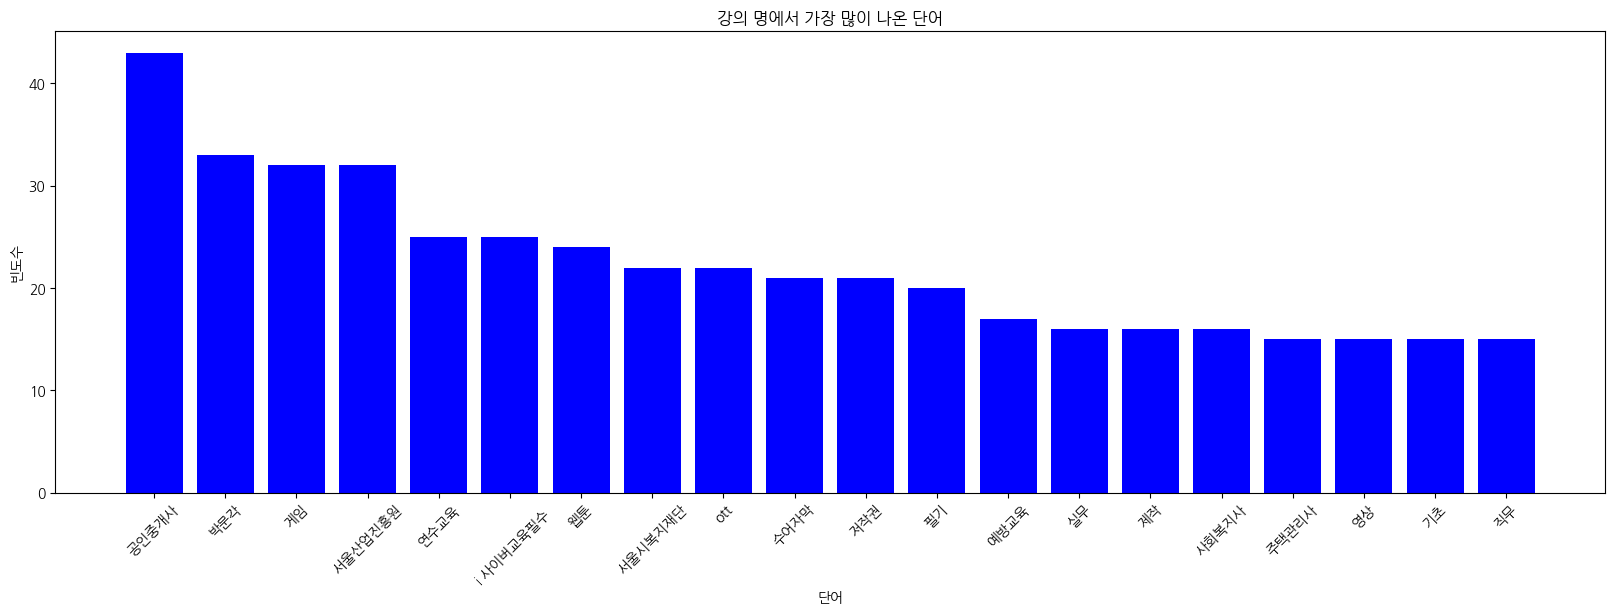

In [21]:
# 불용어 목록 정의 (한국어 및 영어)
stop_words = set(['위한', '교육', '및', '내', '과정', '이해', '함께하는', '노하우', '슬기로운', '실전', '서울시', '콘텐츠', '1', '퀵', '이야기', '2','1급', 'step', '예방'])

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    text = text.lower()  # 소문자로 변환
    words = text.split()
    words = [word for word in words if word not in stop_words]  # 불용어 제거
    return ' '.join(words)

all_words = ' '.join(lec_on_df['강의 명'].apply(preprocess_text)).split()
word_counts = Counter(all_words)

# 상위 10개 단어 시각화
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(20, 6))
plt.bar(words, counts, color='blue')
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.title('강의 명에서 가장 많이 나온 단어')
plt.xticks(rotation=45)
plt.show()

In [22]:
program_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/평생교육기관+프로그램(수요대상별_유형별)_20240516223620.csv')
program_df.head()

,프로그램별(1),프로그램별(2),수요대상별(1),수요대상별(2),2016,2017,2018
0,합계,소계,계,소계,107667,114348,112531
1,합계,소계,계,어린이,9343,9500,9050
2,합계,소계,계,청소년,5451,4753,3401
3,합계,소계,계,성인,78877,88336,88707
4,합계,소계,계,노인,4643,4557,4013


In [23]:
program_1_df = program_df.iloc[:, 3:]
program_1_df.head()

,수요대상별(2),2016,2017,2018
0,소계,107667,114348,112531
1,어린이,9343,9500,9050
2,청소년,5451,4753,3401
3,성인,78877,88336,88707
4,노인,4643,4557,4013


#### 한국기술교육대학교 온라인 평생교유원 이러닝 콘텐츠 목록

In [24]:
e_con_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/한국기술교육대학교_온라인평생교육원 이러닝 콘텐츠 목록_20230925.csv', encoding = ' cp949')
e_con_df.head()


,번호,개발연도,교육구분,분야,콘텐츠명,회차
0,1,2014,평생능력개발,기계,AutoCAD를 활용한 기계도면(기본),22
1,2,2014,평생능력개발,기계,AutoCAD를 활용한 기계도면(응용),21
2,3,2014,평생능력개발,기계,CATIA를 활용한 3D설계(기본),20
3,4,2014,평생능력개발,기계,CATIA를 활용한 3D설계(응용),20
4,5,2014,평생능력개발,기계,CNC선반 프로그램과 활용,24


In [25]:
e_con_df['교육구분'].unique()

array(['평생능력개발', '학점은행', '일학습병행', '취준생무료강의', '신기술', '가상연계', '평생',
       '평생(재개발)', '학점(재개발)', '플랫폼종사자', '취준생'], dtype=object)

In [26]:
e_con_num_df = e_con_df.set_index('번호')

In [27]:
e_con_num_df.head()

,개발연도,교육구분,분야,콘텐츠명,회차
번호,,,,,
1,2014,평생능력개발,기계,AutoCAD를 활용한 기계도면(기본),22
2,2014,평생능력개발,기계,AutoCAD를 활용한 기계도면(응용),21
3,2014,평생능력개발,기계,CATIA를 활용한 3D설계(기본),20
4,2014,평생능력개발,기계,CATIA를 활용한 3D설계(응용),20
5,2014,평생능력개발,기계,CNC선반 프로그램과 활용,24


In [28]:
# 2. 결측치 처리 (예시: 결측치가 있으면 0으로 대체)
e_con_num_df.fillna(0, inplace=True)

# 3. 데이터 형식 변환
e_con_num_df['개발연도'] = e_con_num_df['개발연도'].astype(int)
e_con_num_df['회차'] = e_con_num_df['회차'].astype(int)


In [29]:
e_con_num_df.head()

,개발연도,교육구분,분야,콘텐츠명,회차
번호,,,,,
1,2014,평생능력개발,기계,AutoCAD를 활용한 기계도면(기본),22
2,2014,평생능력개발,기계,AutoCAD를 활용한 기계도면(응용),21
3,2014,평생능력개발,기계,CATIA를 활용한 3D설계(기본),20
4,2014,평생능력개발,기계,CATIA를 활용한 3D설계(응용),20
5,2014,평생능력개발,기계,CNC선반 프로그램과 활용,24


### 평생교육 학습자 관련 데이터

#### 평생교육 학습자 주제별 구별 데이터

In [30]:
learner_18_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/평생교육기관+학습자(주제별_구별)_20240521212959.csv')
learner_18_df.head()

,자치구별(1),자치구별(2),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2018.10,2018.11,2018.12,2018.13
0,자치구별(1),자치구별(2),학습자수,학습자수,학습자수,학습자수,학습자수,학습자수,학습자수,학습자수,학습자수,학습자수,학습자수,학습자수,학습자수,학습자수
1,자치구별(1),자치구별(2),소계,소계,학력보완,학력보완,기초문해,기초문해,직업능력향상,직업능력향상,인문교양,인문교양,문화예술,문화예술,시민참여,시민참여
2,자치구별(1),자치구별(2),계,여자,계,여자,계,여자,계,여자,계,여자,계,여자,계,여자
3,총계,소계,15074954,8621268,1757089,1109683,37175,31011,6131993,2941379,4478233,2655969,2576009,1816217,94455,67009
4,총계,종로구,1118007,569228,29748,21943,825,286,301004,130137,709452,361960,28710,20301,48268,34601


In [31]:
# 불필요한 행 제거
learner_18_df = learner_18_df.drop([0, 1, 2])

# 열 이름 설정 (첫 번째, 두 번째 행을 조합)
columns = [
    "자치구", "자치구별", "학습자수_총계", "학습자수_여자",
    "학력보완_총계", "학력보완_여자", "기초문해_총계", "기초문해_여자",
    "직업능력향상_총계", "직업능력향상_여자", "인문교양_총계", "인문교양_여자",
    "문화예술_총계", "문화예술_여자", "시민참여_총계", "시민참여_여자"
]
learner_18_df.columns = columns

# 결측치 처리 (예시: 결측치가 있으면 0으로 대체)
learner_18_df.fillna(0, inplace=True)

# 데이터 형식 변환 (필요 시)

# 특수문자 제거 (숫자형 변환 전에)
for col in columns[2:]:
    learner_18_df[col] = learner_18_df[col].astype(str).str.replace(',', '')
    learner_18_df[col] = learner_18_df[col].replace('-', '0')  # '-'를 '0'으로 대체
    learner_18_df[col] = learner_18_df[col].astype(int)

# 숫자형 변환
for col in columns[2:]:
    learner_18_df[col] = learner_18_df[col].astype(str).str.replace(',', '').astype(int)


# 전처리된 데이터프레임 출력
learner_18_df.head()

,자치구,자치구별,학습자수_총계,학습자수_여자,학력보완_총계,학력보완_여자,기초문해_총계,기초문해_여자,직업능력향상_총계,직업능력향상_여자,인문교양_총계,인문교양_여자,문화예술_총계,문화예술_여자,시민참여_총계,시민참여_여자
3,총계,소계,15074954,8621268,1757089,1109683,37175,31011,6131993,2941379,4478233,2655969,2576009,1816217,94455,67009
4,총계,종로구,1118007,569228,29748,21943,825,286,301004,130137,709452,361960,28710,20301,48268,34601
5,총계,중구,200081,113211,27038,15643,41,18,36473,15145,89538,48814,46962,33566,29,25
6,총계,용산구,117123,68642,1120,1103,227,163,32706,15329,30061,16544,52909,35437,100,66
7,총계,성동구,214545,123148,16444,7176,541,452,71105,37423,34145,18107,92310,59990,0,0


#### 평생교육 학습자 주제별 유형별 데이터

In [32]:
learner_sub_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/평생교육기관+학습자(주제별_유형별)_20240516223603.csv')
learner_sub_df.head(10)

,프로그램별(1),프로그램별(2),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2018.10,2018.11,2018.12,2018.13
0,프로그램별(1),프로그램별(2),합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
1,프로그램별(1),프로그램별(2),소계,소계,학력보완,학력보완,기초문해,기초문해,직업능력향상,직업능력향상,인문교양,인문교양,문화예술,문화예술,시민참여,시민참여
2,프로그램별(1),프로그램별(2),계,여자,계,여자,계,여자,계,여자,계,여자,계,여자,계,여자
3,합계,소계,15074954,8621268,1757089,1109683,37175,31011,6131993,2941379,4478233,2655969,2576009,1816217,94455,67009
4,평생교육법에 따라 인가·등록·신고된 평생교육시설,소계,11840275,6400717,1753148,1107147,5081,4693,5908166,2780685,3677621,2170684,494445,336340,1814,1168
5,평생교육법에 따라 인가·등록·신고된 평생교육시설,초·중등학교부설,785,526,20,6,175,154,22,10,535,346,33,10,-,-
6,평생교육법에 따라 인가·등록·신고된 평생교육시설,대학(원)부설,333802,203924,253729,148775,66,52,32633,23555,13399,8955,33497,22312,478,275
7,평생교육법에 따라 인가·등록·신고된 평생교육시설,원격형태,10610401,5649131,1442795,933844,11,8,5673652,2656631,3469001,2045179,24942,13469,-,-
8,평생교육법에 따라 인가·등록·신고된 평생교육시설,사업장부설,186123,127384,3054,668,80,80,6641,3968,14302,9979,162046,112689,-,-
9,평생교육법에 따라 인가·등록·신고된 평생교육시설,시민사회단체부설,28714,20484,323,290,671,594,14013,10694,4223,2802,9390,6030,94,74


In [33]:
learner_sub_1_df = learner_sub_df.drop([0, 1, 2])

# 2. 열 이름 설정 (첫 번째, 두 번째 행을 조합)
columns = [
    "프로그램", "프로그램별", "학습자수_총계", "학습자수_여자",
    "학력보완_총계", "학력보완_여자", "기초문해_총계", "기초문해_여자",
    "직업능력향상_총계", "직업능력향상_여자", "인문교양_총계", "인문교양_여자",
    "문화예술_총계", "문화예술_여자", "시민참여_총계", "시민참여_여자"
]
learner_sub_1_df.columns = columns

# 3. 결측치 처리 (예시: 결측치가 있으면 0으로 대체)
learner_sub_1_df.fillna(0, inplace=True)

# 4. 특수문자 제거 (숫자형 변환 전에)
for col in columns[2:]:
    learner_sub_1_df[col] = learner_sub_1_df[col].astype(str).str.replace(',', '').replace('-', '0')
    learner_sub_1_df[col] = learner_sub_1_df[col].astype(int)

In [34]:
learner_sub_1_df.head()

,프로그램,프로그램별,학습자수_총계,학습자수_여자,학력보완_총계,학력보완_여자,기초문해_총계,기초문해_여자,직업능력향상_총계,직업능력향상_여자,인문교양_총계,인문교양_여자,문화예술_총계,문화예술_여자,시민참여_총계,시민참여_여자
3,합계,소계,15074954,8621268,1757089,1109683,37175,31011,6131993,2941379,4478233,2655969,2576009,1816217,94455,67009
4,평생교육법에 따라 인가·등록·신고된 평생교육시설,소계,11840275,6400717,1753148,1107147,5081,4693,5908166,2780685,3677621,2170684,494445,336340,1814,1168
5,평생교육법에 따라 인가·등록·신고된 평생교육시설,초·중등학교부설,785,526,20,6,175,154,22,10,535,346,33,10,0,0
6,평생교육법에 따라 인가·등록·신고된 평생교육시설,대학(원)부설,333802,203924,253729,148775,66,52,32633,23555,13399,8955,33497,22312,478,275
7,평생교육법에 따라 인가·등록·신고된 평생교육시설,원격형태,10610401,5649131,1442795,933844,11,8,5673652,2656631,3469001,2045179,24942,13469,0,0


In [35]:
# learner_sub_df 's index name list
learner_sub_df[learner_sub_df.columns[1]]


0      프로그램별(2)
1      프로그램별(2)
2      프로그램별(2)
3            소계
4            소계
5      초·중등학교부설
6       대학(원)부설
7          원격형태
8         사업장부설
9      시민사회단체부설
10       언론기관부설
11    지식·인력개발형태
12        평생학습관
13           소계
14          도서관
15     문화예술체육시설
16        청소년시설
17       여성관련시설
18          복지관
19       직업훈련시설
20       가족관련시설
21        동자치회관
22         기타시설
Name: 프로그램별(2), dtype: object

### 평생교육 시설 목록

### 평생교육 관련 설문 데이터

In [36]:
survey_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/한국기술교육대학교_온라인평생교육원 설문 질문_20230925.csv', encoding = 'cp949')
survey_df.head()

,설문 아이디,인덱스,타입 코드,질문,옵션 목록
0,2,0,1,"<p style=""font-family: NanumGothic; font-size:...","[{""text"":""10대""},{""text"":""20대""},{""text"":""30대""},..."
1,2,1,5,"<p class=""0"" style=""font-family: NanumGothic; ...","[{""text"":""기계 엔지니어링""},{""text"":""제조 엔지니어링""},{""tex..."
2,2,2,3,"<p class=""0"" style=""font-family: NanumGothic; ...",NaN
3,2,3,5,"<p class=""0"" style=""font-family: NanumGothic; ...","[{""text"":""부품 설계""},{""text"":""조립 설계""},{""text"":""도면..."
4,2,4,2,"<p class=""0"" style=""font-family: NanumGothic; ...",NaN


In [37]:
# 1. 특수문자 및 HTML 엔티티 제거
survey_df['질문'] = survey_df['질문'].str.replace('&nbsp;', ' ').str.strip()
survey_df['옵션 목록'] = survey_df['옵션 목록'].str.replace('&nbsp;', ' ').str.strip()

# 2. NaN 값을 빈 문자열로 변환
survey_df['옵션 목록'] = survey_df['옵션 목록'].fillna('')

# 3. 옵션 목록을 별도의 열로 분리
survey_df['옵션 목록'] = survey_df['옵션 목록'].apply(lambda x: x.split(', ') if x else [])

# 4. 필요한 열을 추가 (옵션 목록을 옵션별로 나누기)
# 최대 옵션 개수를 찾기
max_options = survey_df['옵션 목록'].apply(len).max()

# 새로운 열 추가
for i in range(max_options):
    survey_df[f'옵션_{i+1}'] = survey_df['옵션 목록'].apply(lambda x: x[i] if i < len(x) else None)

# 옵션 목록 열 삭제
survey_df = survey_df.drop(columns=['옵션 목록'])

# 전처리된 데이터프레임 출력
print(survey_df)

      설문 아이디  인덱스  타입 코드                                                 질문  \
0          2    0      1  <p style="font-family: NanumGothic; font-size:...   
1          2    1      5  <p class="0" style="font-family: NanumGothic; ...   
2          2    2      3  <p class="0" style="font-family: NanumGothic; ...   
3          2    3      5  <p class="0" style="font-family: NanumGothic; ...   
4          2    4      2  <p class="0" style="font-family: NanumGothic; ...   
...      ...  ...    ...                                                ...   
1882     424    2      1  <p style="line-height: 1.5; font-family: Nanum...   
1883     424    3      1  <p style="line-height: 1.5; font-family: Nanum...   
1884     424    4      1  <p style="line-height: 1.5; font-family: Nanum...   
1885     424    5      1  <p style="line-height: 1.5; font-family: Nanum...   
1886     424    6      4  <p style="line-height: 1.5; font-family: Nanum...   

                                                   

In [38]:
import json

# HTML 태그와 특수문자 제거 함수
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'<.*?>', '', text)  # HTML 태그 제거
        text = re.sub(r'&nbsp;', ' ', text)  # HTML 엔티티 제거
        text = re.sub(r'[^a-zA-Z0-9가-힣\s]', '', text)  # 특수문자 제거
    return text

# JSON 문자열을 파싱하여 옵션 분리 함수
def parse_options(options):
    if isinstance(options, str):
        try:
            options_list = json.loads(options)
            return [opt['text'] for opt in options_list]
        except json.JSONDecodeError:
            return []
    return []

# '질문' 열 정리
survey_df['질문'] = survey_df['질문'].apply(clean_text)

# '옵션_1' 열 정리 및 새로운 옵션 열 생성
survey_df['옵션_목록'] = survey_df['옵션_1'].apply(parse_options)
max_options = survey_df['옵션_목록'].apply(len).max()

for i in range(max_options):
    survey_df[f'옵션_{i+1}'] = survey_df['옵션_목록'].apply(lambda x: x[i] if i < len(x) else None)

# 불필요한 열 제거
survey_df = survey_df.drop(columns=['옵션_목록'])

# 전처리된 데이터프레임 출력
print(survey_df)

      설문 아이디  인덱스  타입 코드                                                 질문  \
0          2    0      1                                                 연령   
1          2    1      5                           현재 소속하고 있거나 관심 있는 직무 분야는   
2          2    2      3         3D 프로그램으로 제작하고 싶은 제품은 예 핸드폰 금속 악세사리 산업장비 등   
3          2    3      5                      이 과정을 통해 가장 배우고 싶은 기술이나 학습내용은   
4          2    4      2  이 스마트훈련 신규과정 운영에 대한 평가에 참여하시겠습니까  모든 수행 과제물에 대...   
...      ...  ...    ...                                                ...   
1882     424    2      1                                   교육의 진행 방식이 적절하였다   
1883     424    3      1                    교육을 통해 장애인 차별을 예방하는 방법을 알 수 있었다   
1884     424    4      1                        교육을 통해 장애에 대한 인식을 개선할 수 있었다   
1885     424    5      1                               이번 교육에 대해 전반적으로 만족한다   
1886     424    6      4                 교육에 참여한 기타 소감 및 개선 의견을 자유롭게 기술해주세요   

          옵션_1      옵션_2      옵션_3      옵션_4       

In [39]:
survey_df.head()

,설문 아이디,인덱스,타입 코드,질문,옵션_1,옵션_2,옵션_3,옵션_4,옵션_5,옵션_6,...,옵션_8,옵션_9,옵션_10,옵션_11,옵션_12,옵션_13,옵션_14,옵션_15,옵션_16,옵션_17
0,2,0,1,연령,10대,20대,30대,40대,50대,60대 이상,...,None,None,None,None,None,None,None,None,None,None
1,2,1,5,현재 소속하고 있거나 관심 있는 직무 분야는,기계 엔지니어링,제조 엔지니어링,영업 엔지니어링,설계 및 디테일,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2,2,3,3D 프로그램으로 제작하고 싶은 제품은 예 핸드폰 금속 악세사리 산업장비 등,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2,3,5,이 과정을 통해 가장 배우고 싶은 기술이나 학습내용은,부품 설계,조립 설계,도면 작업,제품 디자인,None,None,...,None,None,None,None,None,None,None,None,None,None
4,2,4,2,이 스마트훈련 신규과정 운영에 대한 평가에 참여하시겠습니까 모든 수행 과제물에 대...,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


#### 평생교육 관련 설문 질문 데이터

In [40]:
# 한국교육기술원 평생교육 관련 설문
qna_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/한국기술교육대학교_온라인평생교육원 설문_20230925.csv',encoding = 'cp949')
qna_df.head()

,아이디,기관 아이디,제목,등록 국가,등록 일시
0,2,1,라이브세미나로 배우는 Solidworks Skill Up [사전설문] - 전 문항 필수,KR,2016-09-29 07:40:08
1,5,1,과정 설문(강사 만족도 포함),KR,2016-09-29 11:01:22
2,6,1,e-koreatech 이러닝 강의 만족도,KR,2016-09-29 13:13:30
3,9,1,[NCS기반 직업능력개발훈련 역량강화교육] 강의 만족도 설문 조사,KR,2016-09-30 13:53:16
4,10,1,e-koreatech 이러닝 강의 만족도(삼성디스플레이),KR,2016-10-06 15:01:39


In [41]:
qna_df.columns

Index(['아이디', '기관 아이디', '제목', '등록 국가', '등록 일시'], dtype='object')

### 평생교육기관 종사 인력

In [42]:
em_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/평생교육기관+종사인력(유형별)(2010)_20240516223452.csv')
em_df.head()

,교육시설별(1),교육시설별(2),2010,2010.1,2010.2,2010.3,2010.4
0,교육시설별(1),교육시설별(2),합 계,직종별,직종별,고용형태별,고용형태별
1,교육시설별(1),교육시설별(2),소계,사무직,교·강사,정규직,비정규직
2,합계,소계,28927,8107,20820,8412,20515
3,합계,도서관,2568,1192,1376,892,1676
4,합계,박물관·미술관,589,347,242,248,341


In [43]:
# 첫 두 행 제거
em_df = em_df.drop([0, 1])

# 새로운 열 이름 설정
em_df.columns = ["교육시설", "세부시설", "총합계", "사무직", "교강사", "정규직", "비정규직"]

# 데이터 타입 변환 (숫자형 데이터로 변환)
for col in ["총합계", "사무직", "교강사", "정규직", "비정규직"]:
    em_df[col] = em_df[col].astype(int)

# 인덱스 재설정
em_df = em_df.reset_index(drop=True)

In [44]:
em_df.head()

,교육시설,세부시설,총합계,사무직,교강사,정규직,비정규직
0,합계,소계,28927,8107,20820,8412,20515
1,합계,도서관,2568,1192,1376,892,1676
2,합계,박물관·미술관,589,347,242,248,341
3,합계,청소년시설,2655,782,1873,840,1815
4,합계,여성 관련시설,1624,379,1245,237,1387


### 최근 1년간 평생교육 프로그램을 수강하지 못한 이유

In [45]:
reason_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/최근+1년+간+평생교육+프로그램을+수강하지+못한+이유_20240521211037.csv')
reason_df.head()

,특성별(1),특성별(2),2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,...,2020.25,2020.26,2020.27,2020.28,2020.29,2020.30,2020.31,2020.32,2020.33,2020.34
0,특성별(1),특성별(2),1순위,1순위,1순위,1순위,1순위,1순위,1순위,1순위,...,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위
1,특성별(1),특성별(2),사례수 (명),해당 없음 (%),직장업무로 인해 (%),동기 자신감 부족 (%),건강상의 이유 (%),가족부양에 따른 시간 부족 (%),교육내용이 만족스럽지 못해서 (%),가까운 거리에 교육훈련 기관이 없어서 (%),...,동기 자신감 부족 (%),해당 없음 (%),가족부양에 따른 시간 부족 (%),건강상의 이유 (%),가까운 거리에 교육훈련 기관이 없어서 (%),교육내용이 만족스럽지 못해서 (%),교육시설이 만족스럽지 못해서 (%),학습비가 너무 비싸서 (%),함께 배울 친구가 없어서 (%),기타 (%)
2,전체,소계,3027,29,25,13,9,9,4,3,...,30,29,19,13,12,10,9,7,7,1
3,5권역별,도심권,163,16,17,9,20,8,5,5,...,33,16,22,30,9,11,10,13,6,0
4,5권역별,동북권,944,32,25,9,11,7,4,3,...,26,32,16,17,11,10,11,4,8,2


In [46]:
# 첫 행을 열 이름으로 설정
reason_df.columns = reason_df.iloc[0]

# 첫 두 행 제거
reason_df = reason_df.drop([0, 1])

# 숫자로 표현된 열의 데이터 타입을 숫자형으로 변환
reason_df = reason_df.apply(pd.to_numeric, errors='ignore')

# '특성별' 열을 기반으로 새로운 열 생성
reason_df['특성'] = reason_df['특성별(1)'] + ' - ' + reason_df['특성별(2)']

# '특성별' 열 제거
reason_df = reason_df.drop(columns=['특성별(1)', '특성별(2)'])

# 인덱스 재설정
reason_df = reason_df.reset_index(drop=True)

# '특성' 열을 데이터프레임의 첫 번째 열로 이동
reason_df.insert(0, '특성', reason_df.pop('특성'))

# 데이터프레임 출력
reason_df.head()

,특성,1순위,1순위,1순위,1순위,1순위,1순위,1순위,1순위,1순위,...,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위,1+2순위
0,전체 - 소계,3027,29,25,13,9,9,4,3,3,...,30,29,19,13,12,10,9,7,7,1
1,5권역별 - 도심권,163,16,17,9,20,8,5,5,5,...,33,16,22,30,9,11,10,13,6,0
2,5권역별 - 동북권,944,32,25,9,11,7,4,3,4,...,26,32,16,17,11,10,11,4,8,2
3,5권역별 - 서북권,365,28,24,14,4,13,3,6,3,...,31,28,17,8,27,8,8,7,7,0
4,5권역별 - 서남권,951,14,31,20,10,10,4,3,2,...,37,14,26,15,8,10,8,12,7,1


### 한국기술교육원 평생교육 연구

In [47]:
research_now_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/한국기술교육대학교 평생직업능력개발 연구 현황_20230927.csv', encoding = 'cp949')
research_now_df.head()

,년도,내용,링크
0,2017,고용노동 분야 국제협력(ODA) 사업 신규모델 개발,hrd.koreatech.ac.kr/
1,2017,글로벌 민관협력 네트워크 강화 방안,hrd.koreatech.ac.kr/
2,2017,맞춤형 온라인 직업교육 프로그램 개발 방안,hrd.koreatech.ac.kr/
3,2017,대학연계형 일학습병행제 계약학과의 성과관리방안 연구,hrd.koreatech.ac.kr/
4,2017,직업능력개발훈련교사 특성 및 역량에 따른 훈련성과 분석 및 관리방안 연구,hrd.koreatech.ac.kr/


## 평생학습 통계

### 1. 총괄
- 연도별 평생교육기관 현황
- 연도별 비형식 평생교육기관 개황
- 연도별 준형식 평생교육기관 개황
- 비형식 평생교육기관 현황
- 준형식 평생교육기관 현황
- 지역별 평생교육기관 현황
- 지역별 학생 * 학습자 현황

#### 1) 연도별 평생교육기관 개황

In [48]:
st_years_ins_all_df = pd.read_excel('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/2023년 평생교육통계자료집/2023 평생교육통계자료집(엑셀)/Ⅰ. 총괄/1. 연도별 평생교육기관 개황.xlsx')
st_years_ins_all_df.head(10)

,1. 연도별 평생교육기관 개황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Summary of Lifelong Education Institutions by Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,총괄,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summary
3,구 분\nClassification,NaN,NaN,기관수\nInstitutions,NaN,NaN,학생·학습자수\nStudents·Learners,NaN,NaN,교·강사수\nInstructors,NaN,NaN,사무직원수\nClerical Staffs,NaN,NaN
4,NaN,NaN,NaN,2021,2022.0,2023.0,2021,2022.0,2023.0,2021,2022.0,2023.0,2021,2022,2023
5,총 계,NaN,Total,5536,5901.0,6082.0,21190247,20946117.0,18874572.0,71946,74835.0,94610.0,24368,26697,26872
6,비형식\n평생교육기관\n\nNon-Formal\nLifelong\nEducation...,소 계,Subtotal,4493,4869.0,5029.0,20677768,20438197.0,18381954.0,64460,67381.0,86979.0,19795,21758,22165
7,NaN,초·중등학교부설,Attached to Primary and Secondary School,10,9.0,10.0,772,521.0,777.0,31,28.0,35.0,25,22,25
8,NaN,대학(원)부설,Attached to Higher Education Institution,416,419.0,418.0,539243,630616.0,667744.0,9236,8538.0,14047.0,2018,1959,1962
9,NaN,원격형태,Cyber Lifelong Education Institution,1042,1204.0,1237.0,18457626,17843084.0,15146472.0,14719,17299.0,18337.0,6090,7337,7096


In [49]:
# 1. 불필요한 행 제거
st_years_ins_all_df = st_years_ins_all_df.drop([0, 1, 2])

# 2. 열 이름 설정 (여기서는 3번째 행을 새로운 열 이름으로 설정)
st_years_ins_all_df.columns = ['Classification', 'Sub_classification', 'Institutions', 'Institutions_2021', 'Institutions_2022', 'Institutions_2023', 'Students_Learners_2021', 'Students_Learners_2022', 'Students_Learners_2023', 'Instructors_2021', 'Instructors_2022', 'Instructors_2023', 'Clerical_Staffs_2021', 'Clerical_Staffs_2022', 'Clerical_Staffs_2023']

# 3. 불필요한 NaN 행 제거
st_years_ins_all_df = st_years_ins_all_df.dropna(how='all')

# 4. 인덱스 리셋
st_years_ins_all_df = st_years_ins_all_df.reset_index(drop=True)

# 5. 데이터 형식 변환 (필요한 열에 대해서만)
numeric_columns = ['Institutions_2021', 'Institutions_2022', 'Institutions_2023', 'Students_Learners_2021', 'Students_Learners_2022', 'Students_Learners_2023', 'Instructors_2021', 'Instructors_2022', 'Instructors_2023', 'Clerical_Staffs_2021', 'Clerical_Staffs_2022', 'Clerical_Staffs_2023']
st_years_ins_all_df[numeric_columns] = st_years_ins_all_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# 결과 출력
print(st_years_ins_all_df)

                                       Classification  \
0                              구    분\nClassification   
1                                                 NaN   
2                                                 총 계   
3   비형식\n평생교육기관\n\nNon-Formal\nLifelong\nEducation...   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13                                                NaN   
14                                                NaN   
15  준형식\n평생교육기관\n\nSemi-Formal\nLifelong\nEducatio...   
16                             

In [ ]:
st_years_ins_all_df

#### 7)지역별 학생·학습자 현황

In [50]:
# 지역별 학생 * 학습자 현황
learner_teacher_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/2023년 평생교육통계자료집/2023 평생교육통계자료집(엑셀)/7. 지역별 학생·학습자 현황_.csv')
learner_teacher_df.head()

,구 분\nClassification,Unnamed: 1,Unnamed: 2,합계\nTotal,서울\nSeoul
0,총 계,NaN,Total,"18,874,572","15,036,027"
1,비형식\n평생교육기관\n\nNon-Formal Lifelong Education I...,소 계,NaN,"18,381,954","14,712,459"
2,NaN,초·중등학교부설,NaN,777,363
3,NaN,대학(원)부설,NaN,"667,744","318,554"
4,NaN,원격형태,NaN,"15,146,472","13,579,960"


In [51]:
# 1. Unnamed: 2 열 제거
learner_teacher_df = learner_teacher_df.drop(['Unnamed: 2'], axis=1)

# 2. 열 이름 설정
learner_teacher_df.columns = ['Classification', 'Institution Type', 'Total', 'Seoul']

# 3. NaN 값을 적절히 처리 (상위 행 정보 복사)
learner_teacher_df['Classification'] = learner_teacher_df['Classification'].ffill()

# 4. 특수 문자 제거
learner_teacher_df['Classification'] = learner_teacher_df['Classification'].apply(lambda x: re.sub(r'\W+', ' ', x) if isinstance(x, str) else x)
learner_teacher_df['Institution Type'] = learner_teacher_df['Institution Type'].apply(lambda x: re.sub(r'\W+', ' ', x) if isinstance(x, str) else x)
learner_teacher_df['Classification'] = learner_teacher_df['Classification'].apply(lambda x: re.sub(r'[^ㄱ-ㅎ가-힣 ]', '', x))

# 5. 숫자 외의 문자 제거
learner_teacher_df['Total'] = learner_teacher_df['Total'].apply(lambda x: re.sub(r'[^0-9]', '', x) if isinstance(x, str) else x)
learner_teacher_df['Seoul'] = learner_teacher_df['Seoul'].apply(lambda x: re.sub(r'[^0-9]', '', x) if isinstance(x, str) else x)

# 6. 데이터 형식 변환
learner_teacher_df['Total'] = pd.to_numeric(learner_teacher_df['Total'], errors='coerce')
learner_teacher_df['Seoul'] = pd.to_numeric(learner_teacher_df['Seoul'], errors='coerce')

# 결과 출력
print(learner_teacher_df)

     Classification         Institution Type       Total       Seoul
0               총 계                      NaN  18874572.0  15036027.0
1   비형식 평생교육기관                           소 계  18381954.0  14712459.0
2   비형식 평생교육기관                     초 중등학교부설        777.0       363.0
3   비형식 평생교육기관                       대학 원 부설    667744.0    318554.0
4   비형식 평생교육기관                          원격형태  15146472.0  13579960.0
5   비형식 평생교육기관                         사업장부설    811738.0    182966.0
6   비형식 평생교육기관                      시민사회단체부설    108092.0     47251.0
7   비형식 평생교육기관                        언론기관부설    347581.0    151201.0
8   비형식 평생교육기관                     지식 인력개발형태    462769.0    171568.0
9   비형식 평생교육기관                    시 도평생교육진흥원     28629.0     10404.0
10  비형식 평생교육기관                         평생학습관    808152.0    250192.0
11  비형식 평생교육기관                                   13366.0         NaN
12  비형식 평생교육기관                            학원    691203.0    272272.0
13  준형식 평생교육기관                    

In [52]:
learner_teacher_df


,Classification,Institution Type,Total,Seoul
0,총 계,NaN,18874572.0,15036027.0
1,비형식 평생교육기관,소 계,18381954.0,14712459.0
2,비형식 평생교육기관,초 중등학교부설,777.0,363.0
3,비형식 평생교육기관,대학 원 부설,667744.0,318554.0
4,비형식 평생교육기관,원격형태,15146472.0,13579960.0
5,비형식 평생교육기관,사업장부설,811738.0,182966.0
6,비형식 평생교육기관,시민사회단체부설,108092.0,47251.0
7,비형식 평생교육기관,언론기관부설,347581.0,151201.0
8,비형식 평생교육기관,지식 인력개발형태,462769.0,171568.0
9,비형식 평생교육기관,시 도평생교육진흥원,28629.0,10404.0


###

### 4. 평생교육제도
1) 학점은행제

2) 독학학위제(X)

#### 1) 학점은행제

In [53]:
# 1-1. 기관유형별 교육훈련기관수
hakjum_1_df = pd.read_excel('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/2023년 평생교육통계자료집/2023 평생교육통계자료집(엑셀)/Ⅳ. 평생교육제도/1.학점은행제/1-1. 기관유형별 교육훈련기관수.xlsx')

In [54]:
hakjum_1_df.head()

,1-1. 기관유형별 교육훈련기관수,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Education & Training Institutions by Type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,학점은행제,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Academic Credit Bank System
2,구 분\nClassification,NaN,교육훈련기관\nEducation & Training Institutions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,합계\nTotal,대학(교)부설평생교육원\nLifelong Education Center Attach...,NaN,NaN,전공심화 및\n특별과정\nVocational Training Institution\n,학원\nPrivate Institute,NaN,NaN,...,직업훈련기관\nVocational Training Institutions,NaN,NaN,정부관련기관\nGovernment Affiliated Institution\n\n,고등기술학교\nTrade High School \n ...,특수학교\nSpecial \nSchool\n\n\n,기타평생\n교육시설\nOther Lifelong Education Facility\n,중요무형문화재\nImportant Intangible Cultural\n Asset...,원격교육시설\nCyber Education\n\n\n,K-MOOC\nk-mooc\n\n\n
4,NaN,NaN,NaN,계\nTotal\n\n\n\n,대학\nUniversity\n\n\n\n,전문대학\nJunior College\n\n\n\n,NaN,계\nTotal\n\n\n\n,직업기술\nOccupational Skills\n\n\n,국제화\nInternational Practical Affairs\n\n,...,계\nTotal\n\n\n\n,공공직업\n훈련시설\nPublic Vocational Training Facility,지정직업\n훈련시설\nAppointed Vocational Training Faci...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# 필요없는 열 제거
hakjum_1_df.dropna(axis=1, how='all', inplace=True)

# 필요없는 행 제거
hakjum_1_df.dropna(axis=0, how='all', inplace=True)

# 첫 번째 유효한 행을 새로운 열 이름으로 설정
new_header = hakjum_1_df.iloc[2]
hakjum_1_df = hakjum_1_df[3:]
hakjum_1_df.columns = new_header

# 인덱스 재설정
hakjum_1_df.reset_index(drop=True, inplace=True)

# 특수문자 및 불필요한 공백 제거
hakjum_1_df.columns = hakjum_1_df.columns.str.replace('[^a-zA-Z0-9\s]', '', regex=True).str.strip()
hakjum_1_df = hakjum_1_df.applymap(lambda x: x.replace('\n', ' ').replace('\r', ' ').strip() if isinstance(x, str) else x)

# 결측값 처리 (예: 0으로 채우기)
hakjum_1_df.fillna(0, inplace=True)

# 출력
hakjum_1_df

3,NaN,NaN,Total,Lifelong Education Center Attached to Univ,NaN,NaN,Vocational Training Institution,Private Institute,NaN,NaN,...,Vocational Training Institutions,NaN,NaN,Government Affiliated Institution,Trade High School,Special \nSchool,Other Lifelong Education Facility,Important Intangible Cultural\n Asset,Cyber Education,KMOOC\nkmooc
0,0,0,0.0,계 Total,대학 University,전문대학 Junior College,0.0,계 Total,직업기술 Occupational Skills,국제화 International Practical Affairs,...,계 Total,공공직업 훈련시설 Public Vocational Training Facility,지정직업 훈련시설 Appointed Vocational Training Facility,0.0,0,0.0,0,0.0,0.0,0
1,총 계,Total,446.0,197,128,69,4.0,13,7,0,...,69,0,69,34.0,1,6.0,18,0.0,93.0,11
2,0,0,0.0,시도별,0,0,0.0,0,0,0,...,0,0,0,0.0,By Province,0.0,0,0.0,0.0,0
3,서울,Seoul,203.0,58,48,10,2.0,12,6,0,...,45,0,45,3.0,1,3.0,12,0.0,65.0,2
4,부산,Busan,22.0,16,7,9,0.0,0,0,0,...,0,0,0,0.0,0,0.0,0,0.0,4.0,2
5,대구,Daegu,14.0,10,4,6,0.0,0,0,0,...,0,0,0,1.0,0,0.0,0,0.0,3.0,0
6,인천,Incheon,21.0,7,5,2,0.0,0,0,0,...,9,0,9,1.0,0,1.0,1,0.0,1.0,1
7,광주,Gwangju,11.0,5,3,2,0.0,0,0,0,...,0,0,0,0.0,0,0.0,1,0.0,3.0,2
8,대전,Daejeon,14.0,5,5,0,0.0,0,0,0,...,2,0,2,2.0,0,1.0,2,0.0,1.0,1
9,울산,Ulsan,2.0,2,0,2,0.0,0,0,0,...,0,0,0,0.0,0,0.0,0,0.0,0.0,0


In [60]:
# 1-2. 학점은행제 평가인정 학습과목 현황
hak_2_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/2023년 평생교육통계자료집/2023 평생교육통계자료집(엑셀)/Ⅳ. 평생교육제도/1.학점은행제/1-2. 학점은행제 평가인정 학습과목 개설 현황(1).csv')

In [62]:
# 필요없는 행과 열 제거
hak_2_df.dropna(axis=1, how='all', inplace=True)
hak_2_df.dropna(axis=0, how='all', inplace=True)

# 첫 번째 유효한 행을 새로운 열 이름으로 설정
new_header = hak_2_df.iloc[2]
hak_2_df = hak_2_df[3:]
hak_2_df.columns = new_header

# 인덱스 재설정
hak_2_df.reset_index(drop=True, inplace=True)

# 특수문자 및 불필요한 공백 제거
hak_2_df.columns = hak_2_df.columns.str.replace('[^a-zA-Z0-9\s]', '', regex=True).str.strip()
hak_2_df = hak_2_df.applymap(lambda x: x.replace('\n', ' ').replace('\r', ' ').strip() if isinstance(x, str) else x)

# 결측값 처리 (예: 0으로 채우기)
hak_2_df.fillna(0, inplace=True)

# 데이터 형식 변환 (숫자열로 변환할 수 있는 값들 변환)
for col in hak_2_df.columns:
    hak_2_df[col] = hak_2_df[col].apply(lambda x: pd.to_numeric(x, errors='ignore') if isinstance(x, str) else x)


In [58]:
# 필요없는 열 삭제
hak_2_df = hak_2_df.dropna(axis=1, how='all')

# 특수문자 삭제
hak_2_df.columns = hak_2_df.columns.str.replace('[^a-zA-Z0-9\s]', '')
hak_2_df = hak_2_df.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)

# 불필요한 행 삭제
hak_2_df = hak_2_df.dropna(subset=['합계Total'], axis=0)

# 인덱스 재설정
hak_2_df = hak_2_df.reset_index(drop=True)

# 출력
print(hak_2_df)

KeyError: ['합계Total']

In [ ]:
# 1-3. 기관유형별 학습자수(!)
hak_3_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/2023년 평생교육통계자료집/2023 평생교육통계자료집(엑셀)/Ⅳ. 평생교육제도/1.학점은행제/1-3. 기관유형별 학습자수(1).csv')

In [ ]:
# 1-3. 기관유형별 학습자수(2)
hak_3_2_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/2023년 평생교육통계자료집/2023 평생교육통계자료집(엑셀)/Ⅳ. 평생교육제도/1.학점은행제/1-3. 기관유형별 학습자수(2).csv')

In [ ]:
# 1-4. 연령별 등록 학습자수
hak_4_df = pd.read_excel('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/2023년 평생교육통계자료집/2023 평생교육통계자료집(엑셀)/Ⅳ. 평생교육제도/1.학점은행제/1-4. 연령별 등록 학습자수.xlsx')

In [ ]:
# 1-5. 수강료별 학습과목 수
hak_5_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/2023년 평생교육통계자료집/2023 평생교육통계자료집(엑셀)/Ⅳ. 평생교육제도/1.학점은행제/1-5. 수강료별 학습과목수.csv')

In [ ]:
# 1-6. 시기별 학위취득자 현황
hak_6_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/2023년 평생교육통계자료집/2023 평생교육통계자료집(엑셀)/Ⅳ. 평생교육제도/1.학점은행제/1-6. 시기별 학위취득자 현황.csv')

In [ ]:
# 1-7. 연령별 학위취득자 현황
hak_7_df = pd.read_csv('/content/drive/MyDrive/PROJECT/교육데이터분석공모전/교육데이터모음/2023년 평생교육통계자료집/2023 평생교육통계자료집(엑셀)/Ⅳ. 평생교육제도/1.학점은행제/1-7. 연령별 학위취득자 현황.csv')

In [ ]:
# 1-8. 지역별 학위취득자 현황